<h1><center>House Price Prediction - Regression Techniques</center></h1>

# Table of Contents

* [Importing Required Libraries](#01)
* [Reading Data](#02)
* [Analysing Data](#03)
    * [Visualizing the data](#03a)
        * [Heat Map](#03a1)
        * [Corelation between target variable and numerical features](#03a2)
        * [Pair Plots](#03a3)
* [Data Preprocessing](#04)
    * [Columns with Nan Values](#04a)
    * [Removing Outliers](#04b)
    * [Change of Numerical features to categorical features](#04c)
    * [Replacing missing values in rest of numerical columns](#04d)
    * [Categorical to Numerical features](#04e)
    * [Filling missing values](#04f)
    * [Transformation of skewed features](#04g)
    * [Creating new features](#04h)
    * [Splitting the Dataset](#04i)
* [Building Model](#05)
    * [Linear Regression Model](#05a)
        * [Checking RMSE](#05a1)
* [Testing Model](#06)
    * [Making CSV](#06a)

# Importing Required Libraries<a class="anchor" id="01"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

import sklearn_pandas
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Reading Data<a class="anchor" id="02"></a>

In [3]:
            
data_df = pd.read_csv("C:\\Users\\DELL\\Downloads\\train.csv")
test_df = pd.read_csv("C:\\Users\\DELL\\Downloads\\test.csv")

# Analysing Data <a class="anchor" id="03"></a>

In [4]:
data_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


We are concating the test_df and data_df.

In [6]:
all_data = pd.concat((data_df.loc[:,:], test_df.loc[:, :]))
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


There are total of 81 columns in which 38 are numerical. Few of the numerical columns include - "LotFrontage","MasVnrArea".

In [7]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [8]:
all_data['BsmtFinSF2'].unique()

array([   0.,   32.,  668.,  486.,   93.,  491.,  506.,  712.,  362.,
         41.,  169.,  869.,  150.,  670.,   28., 1080.,  181.,  768.,
        215.,  374.,  208.,  441.,  184.,  279.,  306.,  180.,  580.,
        690.,  692.,  228.,  125., 1063.,  620.,  175.,  820., 1474.,
        264.,  479.,  147.,  232.,  380.,  544.,  294.,  258.,  121.,
        391.,  531.,  344.,  539.,  713.,  210.,  311., 1120.,  165.,
        532.,   96.,  495.,  174., 1127.,  139.,  202.,  645.,  123.,
        551.,  219.,  606.,  612.,  480.,  182.,  132.,  336.,  468.,
        287.,   35.,  499.,  723.,  119.,   40.,  117.,  239.,   80.,
        472.,   64., 1057.,  127.,  630.,  128.,  377.,  764.,  345.,
       1085.,  435.,  823.,  500.,  290.,  324.,  634.,  411.,  841.,
       1061.,  466.,  396.,  354.,  149.,  193.,  273.,  465.,  400.,
        682.,  557.,  230.,  106.,  791.,  240.,  547.,  469.,  177.,
        108.,  600.,  492.,  211.,  168., 1031.,  438.,  375.,  144.,
         81.,  906.,

In [9]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We have to predict the sales price using the variables given. so, first let us a look at the sales price column.

In [10]:
data_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Visualizing Data <a class="anchor" id="03a"></a>

<Axes: >

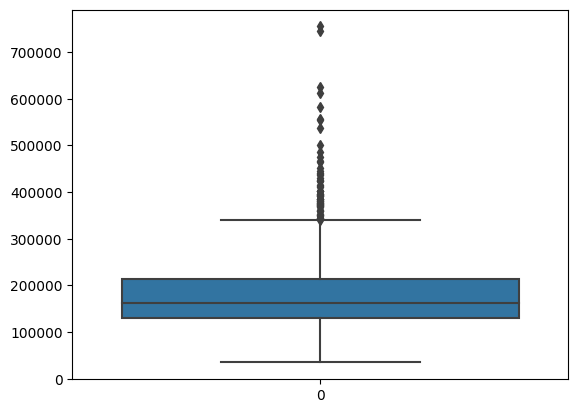

In [11]:
sns.boxplot(data_df['SalePrice'])

Above plot shows that there are 2 outliers with price more than 700000.

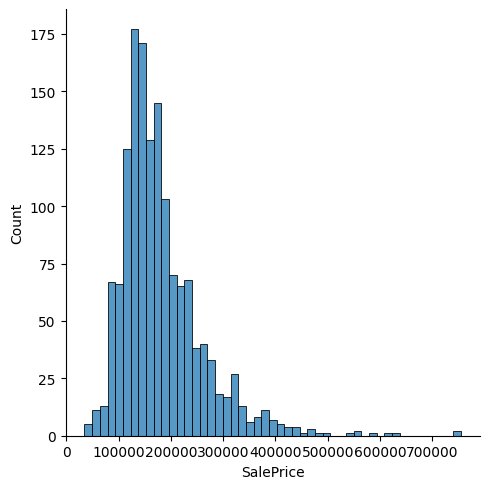

In [12]:
# The Density Plot of SalePrice
sns.displot(data_df['SalePrice'])

This looks like a right-skewed disturbution.

In [13]:
#Using the unskewed data for ploting
dup_data_df = pd.read_csv("C:\\Users\\DELL\\Downloads\\train.csv")

In [14]:
# Positive Skeweness:
data_df['SalePrice'].skew()

1.8828757597682129

In order to normalize the SalePrice,we use Logarithm transformation.

In [15]:
data_df["SalePrice"] = np.log1p(data_df["SalePrice"])

Text(0.5, 1.0, 'Density plot of SalePrice after Log Transformation')

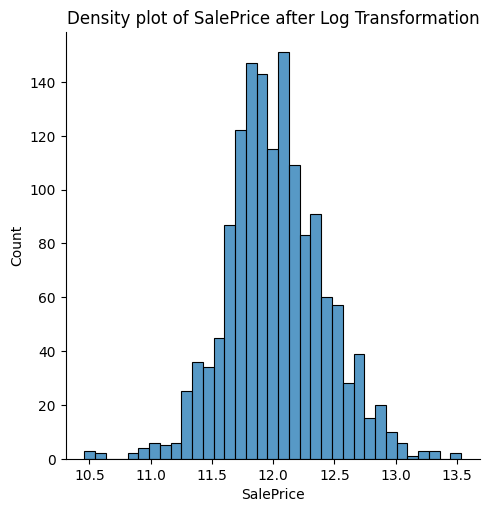

In [16]:
# SalePrice after Log-transformation
sns.displot(data_df["SalePrice"])
plt.title("Density plot of SalePrice after Log Transformation")

In [17]:
y_train = data_df["SalePrice"] 

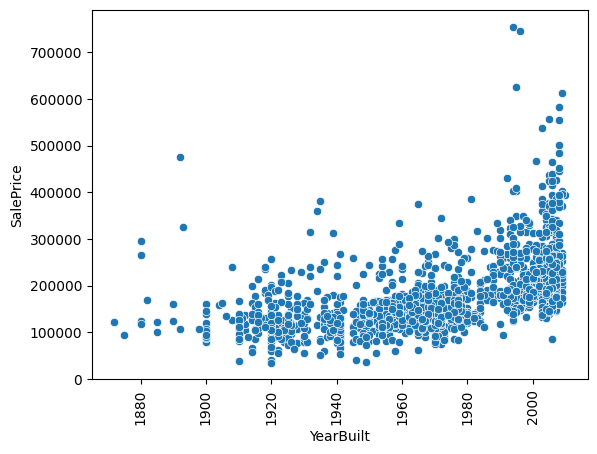

In [18]:
#YearBuilt vs SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data= dup_data_df)
plt.xticks(rotation=90)
plt.show()

Scatterplot shows the relationship between the year the house was built (YearBuilt) and the sale price.There are some older houses that have a high sale price, but there are also some newer houses that have a lower sale price. It is possible that there are other factors that are influencing the sale price, such as location, condition, or other features.

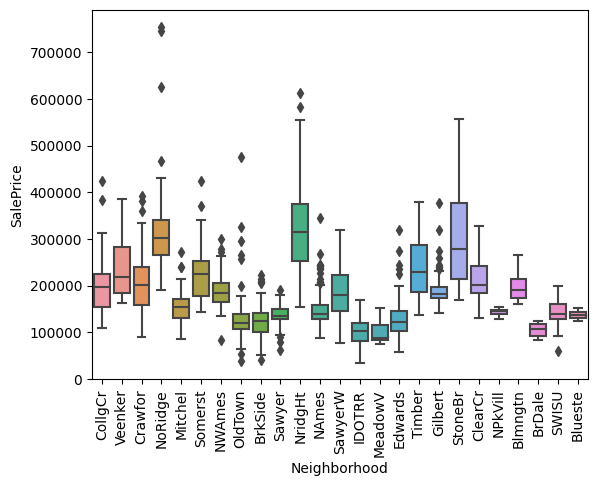

In [19]:
#Neighborhood vs SalePrice
sns.boxplot(x='Neighborhood', y='SalePrice', data=dup_data_df)
plt.xticks(rotation=90)
plt.show()

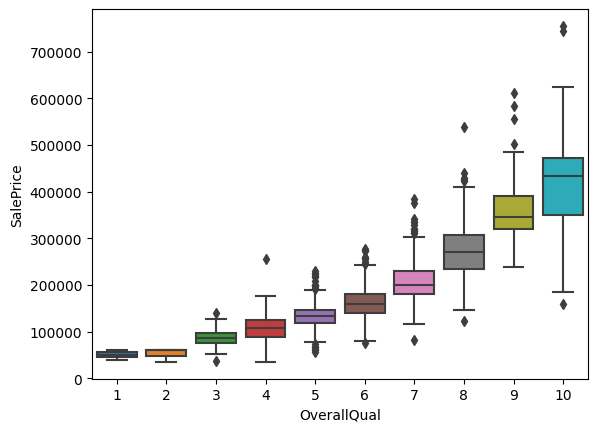

In [20]:
sns.boxplot(x='OverallQual', y='SalePrice', data=dup_data_df)
plt.show()


 The boxplot shows the relationship between the neighborhood where a house is located and its sale price. We can see that the median sale price varies significantly across different neighborhoods. For example, houses in the Northridge neighborhood tend to have a higher median sale price compared to those in the Sawyer neighborhood.

### Heat Map <a class="anchor" id="03a1"></a>

C:\Users\DELL\AppData\Local\Temp\ipykernel_19768\1944316437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dup_data_df.corr()


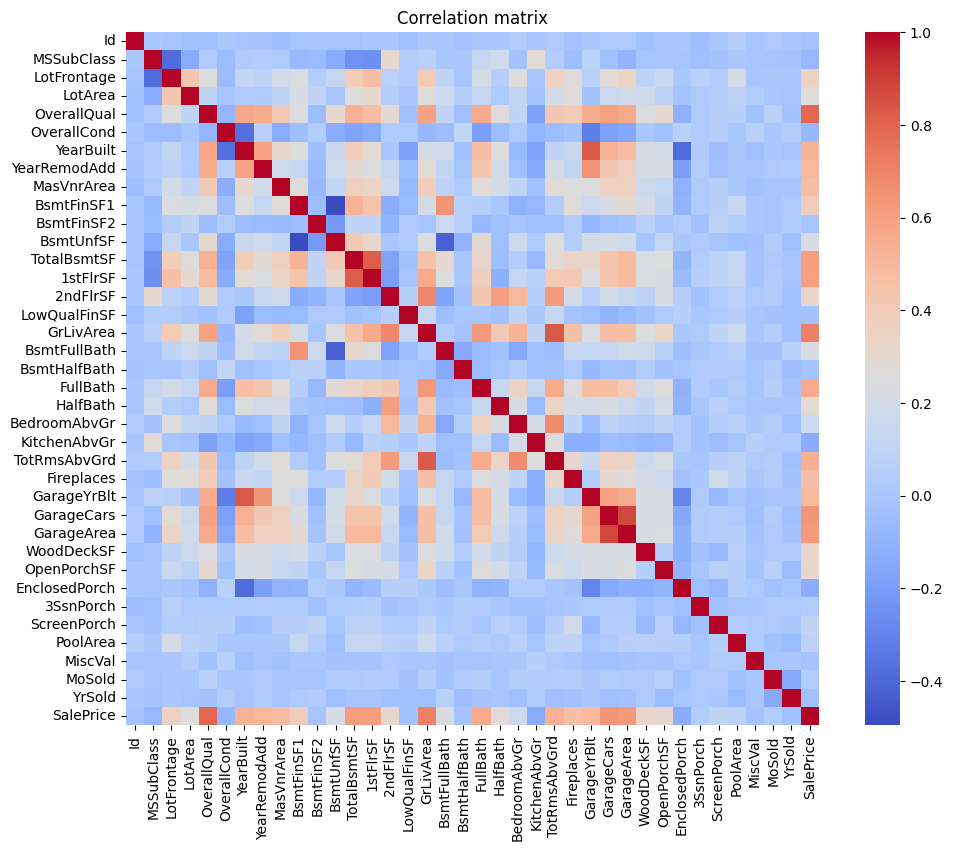

In [21]:
# Calculate correlation matrix
corr_matrix = dup_data_df.corr()

# Create heatmap using pandas
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)
plt.title("Correlation matrix")
plt.show()

The resulting heatmap shows the correlation values between each pair of numerical features in the dataset. Darker colors represent higher correlation values, while lighter colors represent lower correlation values. For example, we can see that OverallQual has a strong positive correlation with SalePrice, while BsmtFinSF1 has a moderate positive correlation with SalePrice. The diagonal line represents the correlation of each feature with itself, which is always 1.

Since the heatmap is too large to draw precise information, we use correlation matrix between the SalePrice and other features.

### Correlation between the target variable and the numerical features <a class="anchor" id="03a2"></a>

C:\Users\DELL\AppData\Local\Temp\ipykernel_19768\1763668001.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dup_data_df.corr()


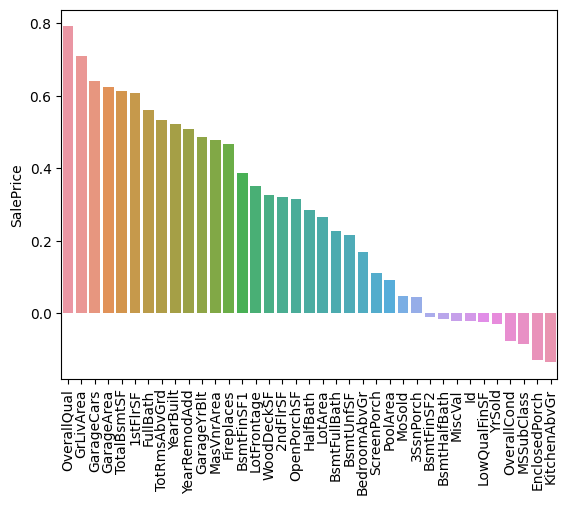

In [22]:

corr_matrix = dup_data_df.corr()
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)[1:]
sns.barplot(x=corr_with_target.index, y=corr_with_target)
plt.xticks(rotation=90)
plt.show()                                        #NTC

From the bar plot, we can see that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, and YearBuilt are the features that have the strongest positive correlation with the target variable.  On the other hand, features like KitchenAbvGr, EnclosedPorch, and MssubClass have a negative correlation with the target variable.

### Pairplots<a class="anchor" id="03a3"></a>

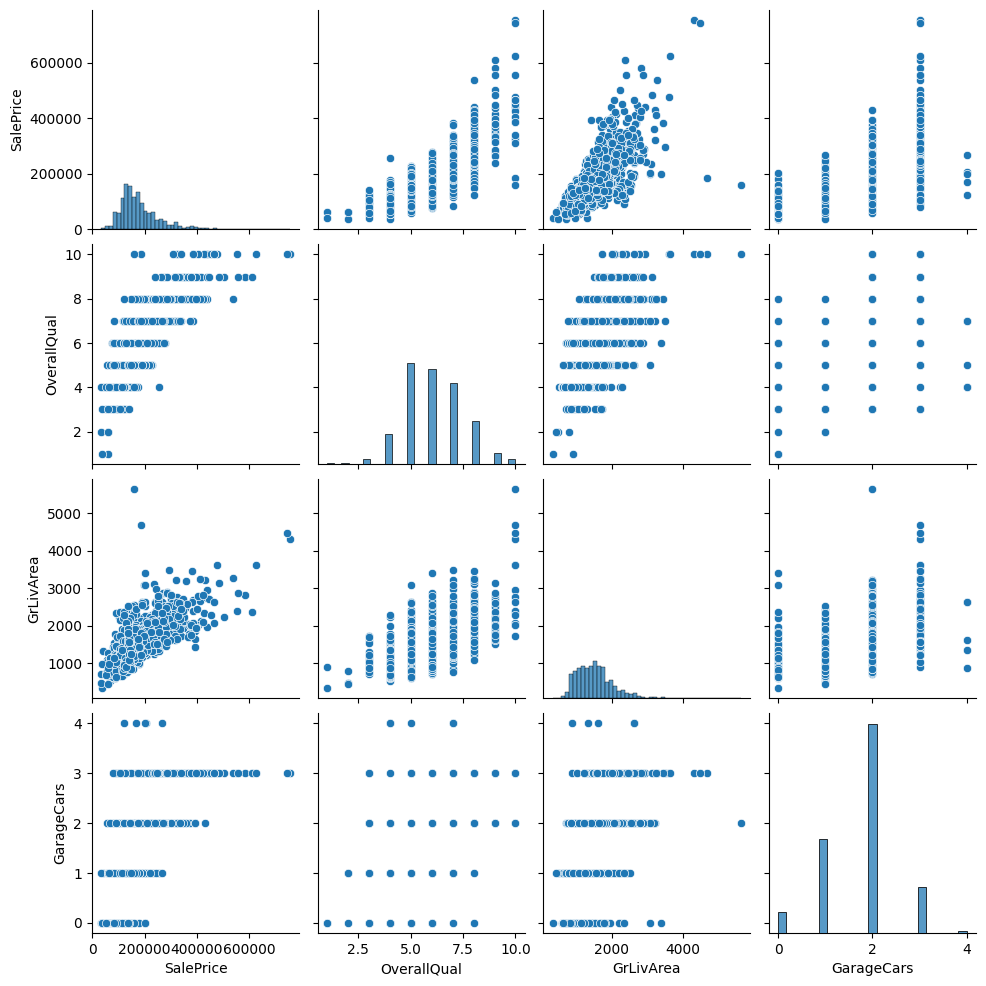

In [23]:
# Correlation between Sale Price and Key Features using Pairplots
sns.pairplot(dup_data_df, vars=["SalePrice", "OverallQual", "GrLivArea", "GarageCars"])
plt.show()

From the pair plot, we can see that 'SalePrice' has a strong positive correlation with 'OverallQual' and 'GrLivArea'. This suggests that houses with higher overall quality and larger above ground living area tend to have higher sale prices. Additionally, we can see that 'GarageCars' also has a moderate positive correlation with 'SalePrice', indicating that houses with more garage capacity also tend to have higher sale prices.

# Data Prepocessing<a class="anchor" id="04"></a>

## Columns with Nan values<a class="anchor" id="04a"></a>

In [24]:
#checking the fraction of Nan values in each column.
col_nan = data_df.isna().sum() / data_df.shape[0]

In [25]:
nan_value = data_df.isna().sum()
nan_value =  nan_value[nan_value > 0]

print("\nColumns with missing values:\n", nan_value)



Columns with missing values:
 LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


We are creating a new variable called nan_value. The isna() method is called on the data_df dataframe to create a new dataframe with the same shape as data_df, where each element is True if it is missing and False otherwise. 

The sum() method is then called on this dataframe to sum the number of True values in each column. Later we use nan_value > 0 as a boolean mask and store values in nan_value.

Text(0.5, 1.0, 'Variables with the highest percentage of Nan values')

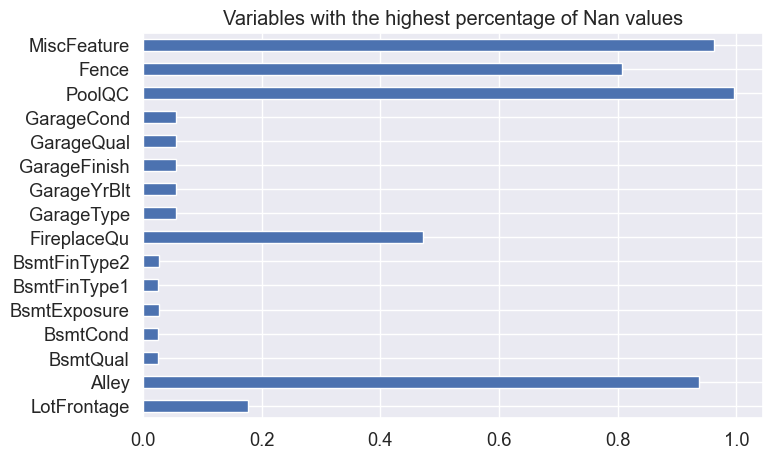

In [26]:
plt.figure(figsize=(8, 5)) #setting figure size
sns.set(font_scale=1.2)    #setting font scale
col_nan[col_nan > 0.01].plot(kind = "barh") #plotting the fraction of Nan values in each column.
plt.title("Variables with the highest percentage of Nan values") #setting the title

In [27]:
# Dropping id columns for both train and test dataset
data_df = data_df.drop("Id", axis=1)
test_df = test_df.drop("Id", axis=1)

#### Removing columns that contain the same value in 100%

Columns such as Street and Utilities contain only one value "Pave" and "AllPub" respectively. So remoivng them from both datasets.

In [28]:
data_df = data_df.drop(["Street", "Utilities"], axis=1)
test_df = test_df.drop(["Street", "Utilities"], axis=1)

## Removing Outliers <a class="anchor" id="04b"></a>

For removing outliers, we use Z-score method. Z-scores are expressed in terms of standard deviations from their means. As a result, these z-scores have a distribution with a mean of 0 and a standard deviation of 1. We use threshold = 3 to identify outliers.

Z-score method
    Function returns a dataframe without rows labeled as 'outliers' according to the given threshold.  
    
    If columns = None, transform all numerical columns.
    If removed = True, return also dataframe with removed rows.

In [29]:
def remove_outliers(dataset, threshold, columns=None, removed = False): #taking 4 parameters to remove outliers
    
    if columns==None: #if columns parameter was not specified it takes columns of all numeric data types.
        numerics = ['int64','float64'] #creating a list of the numeric data types
        columns = dataset.select_dtypes(include=numerics).columns #selecting the columns which have numeric data types.
    
    tmp = dataset.copy()  #creating a copy of the original dataset to aviod direct modification.
    z = np.abs(stats.zscore(tmp[columns]))  #computing the z-score for each value in the specified columns.
    outliers = [row.any() for row in (z > threshold)]   # creates boolean values if any row has outliers based on threshold
    outliers_idxs = tmp.index[outliers].tolist()     #creates a list of the row indices that have been identified as outliers.
    print("Number of removed rows = {}".format(len(outliers_idxs)))   #prints the  number of rows that have been identified as outliers.
    if removed:
        return dataset.drop(outliers_idxs), tmp.loc[outliers]   #returns the modified dataset (with outliers removed) and a copy of the original dataset containing only the removed rows.
    else:
        return dataset.drop(outliers_idxs)  #returns the modified dataset (with outliers removed) if the removed flag is not set to True.

In [30]:
data_df["GrLivArea"]

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [31]:
#removing the records where 'GrLivArea' is more than 4500 as they tend to have a low saleprice.
clear_data = data_df.drop(data_df[(data_df['GrLivArea']>4500)].index)

In [32]:
# Concatenate all data together - both train and test
train_ = clear_data.drop(['SalePrice'], axis=1)
all_data = pd.concat([data_df, test_df]).reset_index(drop=True)

#### LotFrontage feature

According to data given,LotFrontage is a linear feet of street connected to property. We are calculating the mean,median and avg_mean_median for all neighborhood.

In [33]:
neigh_lot_frontage = data_df.groupby('Neighborhood')['LotFrontage'].agg(["mean", "median"])


In [34]:
neigh_lot_frontage['avg_mean_median'] = (neigh_lot_frontage['mean'] + neigh_lot_frontage['median'] )/ 2
neigh_lot_frontage

,mean,median,avg_mean_median
Neighborhood,,,
Blmngtn,47.142857,43.0,45.071429
Blueste,24.000000,24.0,24.000000
BrDale,21.562500,21.0,21.281250
BrkSide,57.509804,52.0,54.754902
ClearCr,83.461538,80.0,81.730769
CollgCr,71.682540,70.0,70.841270
Crawfor,71.804878,74.0,72.902439
Edwards,68.217391,65.5,66.858696
Gilbert,79.877551,65.0,72.438776


Lotfrontage is the length of the frontage of a property. This variable can be important in real estate, as it can affect the property's value and its potential uses. 

In [35]:
# transformation into medians
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


It fills the missing values in the 'LotFrontage' column.It groups the data by 'Neighborhood', calculates the mean and median of the 'LotFrontage' for each neighborhood using the 'groupby' function, and stores the result in the 'neigh_lot_frontage' dataframe. 

Then, it uses the 'transform' method on the 'LotFrontage' column of the 'all_data' dataframe to fill the missing values with the median value of the corresponding neighborhood, using the 'fillna' function.

This is done by passing a lambda function to the 'transform' method that computes the median of each group of 'LotFrontage' values within the same neighborhood.

## Change of numerical features to categorical features <a class="anchor" id="04c"></a>

In [36]:
#creating a function convert_to_string
def convert_to_string(df, columns): 
    df[columns] = df[columns].astype(str)
    return df

In [37]:
num_to_categ_features = ['MSSubClass', 'OverallCond']

all_data = convert_to_string(all_data, columns = num_to_categ_features)

num_to_categ_features is a list of column names that have numerical data but should be treated as categorical features. convert_to_string is a function that takes the DataFrame and the list of columns to convert as inputs, and it returns a new DataFrame where the specified columns are converted to categorical features 


The reason for doing this is that sometimes a numerical column is actually representing different categories or classes, such as MSSubClass, which represents the type of dwelling involved in the sale, or OverallCond, which represents the overall condition rating of the house. By treating these features as categorical, we can make sure that our models can properly capture the relationship between the features and the target variable.

## Replacing missing values in the rest of numerical columns <a class="anchor" id="04d"></a>

For the numerical data,we use SimpleImputer object from sklearn library. 
For columns: BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, BsmtFullBath and BsmtHalfBath , MasVnrArea we fill Nan values with constant = 0 and for the rest with median according to their stats.

In [38]:
num_features = all_data.select_dtypes(include=['int64','float64']).columns
num_features_to_constant = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"] 
num_features_to_median = [feature for feature in num_features if feature not in num_features_to_constant+ ["SalePrice"]]

In [39]:
# Generating numerical features as input to DataFrameMapper.
numeric_features_median = sklearn_pandas.gen_features(columns=[num_features_to_median], 
                                               classes=[{'class': SimpleImputer, 
                                                         'strategy': 'median', 
                                                         'missing_values' : np.nan}])



In [40]:
numeric_features_zero = sklearn_pandas.gen_features(columns=[num_features_to_constant], 
                                               classes=[{'class': SimpleImputer, 
                                                         'strategy': 'constant',
                                                         'fill_value' : 0, 
                                                         'missing_values' : np.nan}])

In [41]:
missing_val_imputer = sklearn_pandas.DataFrameMapper(numeric_features_median + numeric_features_zero)  

The DataFrameMapper library is being used to apply a list of transformers to columns. Here, numeric_features_median and numeric_features_zero are two lists  The first list contains the SimpleImputer transformer that imputes missing values in numeric columns using the median strategy, and the second list contains the SimpleImputer transformer that imputes missing values in numeric columns using the constant strategy with a fill value of 0. The resulting list of transformers is assigned to the variable missing_val_imputer.

In [42]:
# Fitting
imputed_median = missing_val_imputer.fit(all_data)

# Transformation
imputed_features = imputed_median.transform(all_data)

# Putting into dataframe
imputed_df = pd.DataFrame(imputed_features, index=all_data.index, columns=num_features_to_median + num_features_to_constant)

imputed_df is the new dataframe created using the imputed features from imputed_features, with the same index as all_data and column names as specified by num_features_to_median and num_features_to_constant. It  creates a cleaned version of the original dataset with missing values imputed using the median and constant values as specified.

## Categorical to numerical data <a class="anchor" id="04e"></a>

Transforming present categorical data to numerical.

In [43]:
# Selecting category features       
cat_feats = all_data.select_dtypes(include=['object']).columns

In [44]:
cat_feats.sort_values()

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')

## Filling Missing values <a class="anchor" id="04f"></a>

In [45]:
#Filling the 'GarageCond' column with most repeated word in the column.
data_df['GarageCond'] = data_df['GarageCond'].fillna(data_df['GarageCond'].mode()[0])

Since it is practically not possible to write lines for rest of all columns. we use none_transform function to fill in the missing categorical values.

In [46]:
#filling the missing values specifically according to data.
#Using none_transform function which converts missing categorical values into specific strings from the none_conversion dictionary.
none_conversion = [("MasVnrType","None"),
                  ("BsmtQual","NA"), 
                  ("Electrical", "SBrkr"),
                  ("BsmtCond","TA"),
                  ("BsmtExposure","No"),
                  ("BsmtFinType1","No"),
                  ("BsmtFinType2","No"),
                  ("CentralAir","N"),
                  ("Condition1","Norm"), 
                  ("Condition2","Norm"),
                  ("ExterCond","TA"),
                  ("ExterQual","TA"), 
                  ("FireplaceQu","NA"),
                  ("Functional","Typ"),
                  ("GarageType","No"), 
                  ("GarageFinish","No"), 
                  ("GarageQual","NA"), 
                  ("GarageCond","NA"), 
                  ("HeatingQC","TA"), 
                  ("KitchenQual","TA"), 
                  ("Functional","Typ"), 
                  ("MSZoning", "None"),
                  ("Exterior1st", "VinylSd"), 
                  ("Exterior2nd", "VinylSd"), 
                  ("SaleType", "WD")]

In [47]:
# Function that converts missing categorical values into specific strings according to "conversion_list" 
# Returns the dataframe after transformation.
    
def none_transform(df, conversion_list):
    
    for col, new_str in conversion_list:
        df.loc[:, col] = df.loc[:, col].fillna(new_str)
    return df


In [48]:
# Applying the "none_transform" function 
all_data = none_transform(all_data, none_conversion)

In [49]:
len(all_data.columns)

78

## Transformation of skewed features <a class="anchor" id="04g"></a> 

As for linear models preferable are normally distributed data,we are transforming the skewed features to make them more normally distributed.

In [50]:
# collecting the numeric features without considering SalePrice
numeric_features = [feat for feat in num_features if feat not in ['SalePrice']] 



In [51]:
# selecting columns with skew more than 0.5
skewed_features = all_data[num_features].apply(lambda x: x.dropna().skew())
skewed_features = skewed_features[skewed_features > 0.5].index
print("\nHighly skewed features: \n\n{}".format(skewed_features.tolist()))


Highly skewed features: 

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


Using the box cox transformation to transform non-normal dependent variables into a normal shape.

In [52]:
##The “optimal lambda” is the one that results in the best approximation of a normal distribution curve.we use lambda= 0.15.
lambda_ = 0.15
for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature], lambda_)

In [53]:
order_dict = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5} #Maping the values
neighborhoods_map = {'StoneBr': 2, 'NridgHt': 2, 'NoRidge': 2,
                    'MeadowV': 0, 'IDOTRR': 0, 'BrDale': 0,
                    'CollgCr': 1, 'Veenker': 1, 'Crawfor': 1,
                    'Mitchel': 1, 'Somerst': 1, 'NWAmes': 1,
                    'OldTown': 1, 'BrkSide': 1, 'Sawyer': 1,
                    'NAmes': 1, 'SawyerW': 1, 'Edwards': 1,
                    'Timber': 1, 'Gilbert': 1, 'ClearCr': 1,
                    'NPkVill': 1, 'Blmngtn': 1, 'SWISU': 1,
                    'Blueste': 1}


def ordered_label_transformer(X):  
    def get_label(t):
        return order_dict[t]           #It that maps categorical values to ordered numerical labels using order_dict.
    return np.array([get_label(n) for n in X])   #It returns an array of labels corresponding to the input array X.

def neighborhood_transformer(X):     # function neighborhood_transformer takes an array 
    def get_label(t): #get_label function maps the input value to its corresponding value in neighborhoods_map dictionary.          
        return neighborhoods_map[t]   
    return np.array([get_label(n) for [n] in X])  #converts list of neighborhood names into an array of integer labels 

In neighborhoods_map, the keys are the different neighborhoods and the values are their corresponding numerical values. For example, "StoneBr" has a value of 2.

Two transformer functions are then defined - ordered_label_transformer and neighborhood_transformer. These functions take in a list of categorical values and convert them to numerical values using the respective dictionary. The ordered_label_transformer function is used for the rating scale values and the neighborhood_transformer function is used for the neighborhoods.

In [54]:
order_feats = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual", "BsmtQual",
               "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond"]

original_features_df = all_data[order_feats + ['Neighborhood']]

In [55]:
original_features_df

,ExterQual,ExterCond,HeatingQC,KitchenQual,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond,Neighborhood
0,Gd,TA,Ex,Gd,Gd,TA,NA,TA,TA,CollgCr
1,TA,TA,Ex,TA,Gd,TA,TA,TA,TA,Veenker
2,Gd,TA,Ex,Gd,Gd,TA,TA,TA,TA,CollgCr
3,TA,TA,Gd,Gd,TA,Gd,Gd,TA,TA,Crawfor
4,Gd,TA,Ex,Gd,Gd,TA,TA,TA,TA,NoRidge
...,...,...,...,...,...,...,...,...,...,...
2914,TA,TA,Gd,TA,TA,TA,NA,NA,NA,MeadowV
2915,TA,TA,TA,TA,TA,TA,NA,TA,TA,MeadowV
2916,TA,TA,Ex,TA,TA,TA,TA,TA,TA,Mitchel
2917,TA,TA,TA,TA,Gd,TA,NA,NA,NA,Mitchel


order_feats includes quality ratings for external materials, heating, kitchen, basement, fireplace, and garage. It then creates a new dataframe original_features_df by selecting these features along with the "Neighborhood" feature from the all_data dataframe.

The purpose of this is to select only the relevant features and neighborhood data to be used in the subsequent steps of modelling

In [56]:
order_features = [(f, FunctionTransformer(ordered_label_transformer)) for f in order_feats]
neighb_features = [(['Neighborhood'], FunctionTransformer(neighborhood_transformer))]


It has two lists of tuples: order_features and neighb_features.

order_features contains tuples where the first element is a string representing a feature name (e.g., "ExterQual") and the second element is a FunctionTransformer object created using the ordered_label_transformer function. This function takes as input a categorical feature with ordered labels (e.g., "Po", "Fa", "TA", "Gd", "Ex") and maps them to numerical values in a consistent order (i.e., "NA" -> 0, "Po" -> 1, "Fa" -> 2, "TA" -> 3, "Gd" -> 4, "Ex" -> 5).


neighb_features contains a single tuple where the first element is a list containing a single string representing the "Neighborhood" feature and the second element is a FunctionTransformer object created using the neighborhood_transformer function. This function takes as input a categorical feature representing neighborhoods and maps them to numerical values according to a predefined dictionary (i.e., neighborhoods_map).

In [57]:
label_encoder = DataFrameMapper(neighb_features + order_features)

cols = ["Neighborhood"] + order_feats

transformed_feats = label_encoder.fit_transform(all_data)

transformed_df = pd.DataFrame(transformed_feats, index=all_data.index, columns=cols)


It creates a DataFrameMapper object called label_encoder which uses the previously defined transformation functions to transform the categorical variables in the all_data DataFrame to numerical values.

The transformed features are stored in transformed_feats, which is then used to create a new DataFrame called transformed_df with the same index and column names as all_data, but with the categorical variables replaced with their corresponding numerical values.

The cols variable is used to ensure that the column order of transformed_df is consistent with all_data.

In [58]:
original_features_df.shape

(2919, 10)

In [59]:
# feature without any transformation till now      
rest_features = set(pd.concat([imputed_df, original_features_df],axis=1).columns).symmetric_difference(set(all_data.columns))
rest_features_df = all_data[list(rest_features)]

This code is creating a new dataframe rest_features_df that includes all the columns from all_data that were not included in imputed_df and original_features_df. It first calculates the symmetric difference between the set of columns in imputed_df and original_features_df and the set of columns in all_data. This gives the set of columns that are not in both sets. Then it selects those columns from all_data and creates a new dataframe rest_features_df.

In [60]:
all_data = pd.concat([imputed_df, original_features_df, rest_features_df],axis=1)

In [61]:
all_data.shape

(2919, 78)

## Creating new features <a class="anchor" id="04h"></a>

Adding new feautres as these would contribute more in successful prediction of the result.
"TotalSqrtFeet" - Total Live Area ;                             
"TotalBaths" - Total Area for Bathrooms

In [62]:
# Total Square Feet for house
all_data["TotalSqrtFeet"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]
# Total number of bathrooms
all_data["TotalBaths"] = all_data["BsmtFullBath"] + (all_data["BsmtHalfBath"]  * .5) + all_data["FullBath"] + (all_data["HalfBath"]* .5)

In [63]:
# If the house has a garage
all_data['Isgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a fireplace
all_data['Isfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a pool
all_data['Ispool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has second floor
all_data['Issecondfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Open Porch
all_data['IsOpenPorch'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Wood Deck
all_data['IsWoodDeck'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

In [64]:
#droping 'SalePrice' 

all_data = all_data.drop(["SalePrice"], axis = 1)

In [65]:
#'pd.get_dummies' function in pandas is used to perform one-hot encoding. It automatically identifies categorical variables in the DataFrame and creates new binary columns for each category
hot_one_features = pd.get_dummies(all_data).reset_index(drop=True)
hot_one_features.shape

(2919, 324)

In [66]:
all_data = pd.concat([transformed_df, hot_one_features],axis=1)

## Splitting into train/test  <a class="anchor" id="04i"></a>

In [67]:
train_preprocessed = all_data.iloc[:len(data_df),:]
test_preprocessed = all_data.iloc[len(train_preprocessed):,:]
print(len(test_preprocessed) == len(test_df))

True


# Building Model <a class="anchor" id="05"></a>

In [68]:
X_train = train_preprocessed

### Linear Regression Model <a class="anchor" id="05a"></a>

In [69]:
lr_model = make_pipeline(RobustScaler(), LinearRegression()) #creating a pipeline 
lr_model.fit(X_train, y_train)        #fitting data into model
y_train_pred = lr_model.predict(X_train)  #predict the target variable
MSE_train = np.mean((y_train_pred - y_train)**2) #Calculating Mean Squared Error



In [70]:
#predicted values for the test dataset are stored in the variable "Y_pred"
Y_pred = lr_model.predict(test_preprocessed) 

### Checking RMSE <a class="anchor" id="05b"></a>

In [71]:
X = X_train
y = y_train
yp=lr_model.predict(X)
np.sqrt(np.mean(np.square(y-yp)))

0.09265182307202269

# Testing Model<a class="anchor" id="06"></a>

In [72]:
Y_pred

array([11.71166637, 12.08241315, 12.12042476, ..., 12.07238927,
       11.64651258, 12.29997488])

In [73]:
#Converting predictions into dataframe
predictions = pd.DataFrame({"SalePrice": Y_pred}, index = test_preprocessed.index+1)
predictions.index.name = "Id"
predictions

,SalePrice
Id,
1461,11.711666
1462,12.082413
1463,12.120425
1464,12.218609
1465,12.188078
...,...
2915,11.307795
2916,11.345243
2917,12.072389


In [74]:
predictions['SalePrice'] = np.exp(predictions['SalePrice'])

Applying a exponential function to the "SalePrice" column. This is done to reverse the logarithmic transformation that was applied to the target variable during the preprocessing stage, so that the predicted sale prices are expressed in their original, untransformed units.

In [75]:
predictions.head

<bound method NDFrame.head of           SalePrice
Id                 
1461  121986.585959
1462  176736.136536
1463  183583.478166
1464  202523.091025
1465  196433.206007
...             ...
2915   81454.142300
2916   84562.212925
2917  174973.404211
2918  114292.082644
2919  219690.469222

[1459 rows x 1 columns]>

## Making CSV<a class="anchor" id="06a"></a> 

In [76]:
predictions.to_csv('predictions.csv', index=False)